In [2]:
# We can use the pandas library in python to read in the csv file.
import pandas as pd
#for numerical computaions we can use numpy library
import numpy as np

In [5]:
# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pd.read_csv("/content/Titanic-Dataset.csv")
# Print the first 5 rows of the dataframe.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load datasets
train_df = pd.read_csv("/content/Titanic-Dataset.csv")
test_df = pd.read_csv("/content/Titanic-Dataset.csv")

# --- PREPROCESSING ---
# Select useful features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Combine train + test temporarily to handle preprocessing consistently
combined = pd.concat([train_df[features], test_df[features]])

# Handle categorical → numeric
combined = pd.get_dummies(combined, columns=["Sex", "Embarked"], drop_first=True)

# Handle missing values (simple strategy, can be improved)
combined = combined.fillna(combined.median())

# Split back into train/test
X = combined.iloc[:len(train_df)]
X_test = combined.iloc[len(train_df):]
y = train_df["Survived"]

# --- MODEL ---
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Validate on train split
y_pred = model.predict(X_valid)
print("Validation Accuracy:", accuracy_score(y_valid, y_pred))

# --- PREDICTION FOR SUBMISSION ---
test_preds = model.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_preds
})
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")


Validation Accuracy: 0.8100558659217877
Submission file created: submission.csv


In [10]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
titanic.shape

(891, 12)

In [11]:
#Describe gives statistical information about numerical columns in the dataset
titanic.describe()
#you can check from count if there are missing vales in columns, here age has got missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#total values in each column, null/not null, datatype, memory occupied etc
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
null_columns=titanic.columns[titanic.isnull().any()]
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
import pandas as pd

# Load the test set (re-run this cell if kernel restarted)
titanic_test = pd.read_csv("/content/Titanic-Dataset.csv")

# Now check missing values
print(titanic_test.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
#how about test set??
titanic_test.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [23]:
pd.options.display.mpl_style = 'default'

OptionError: You can only set the value of existing options

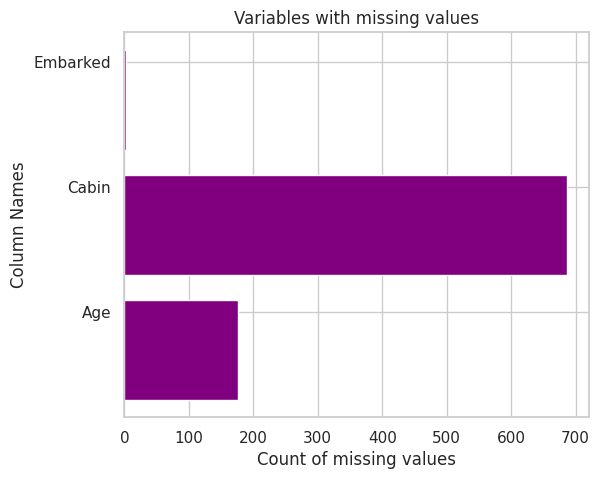

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Seaborn style + scaling
sns.set_theme(style="whitegrid", font_scale=1)

labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(titanic[col].isnull().sum())

ind = np.arange(len(labels))
width = 0.6

fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')

ax.set_yticks(ind + (width/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values")

plt.show()

VISUALISATION

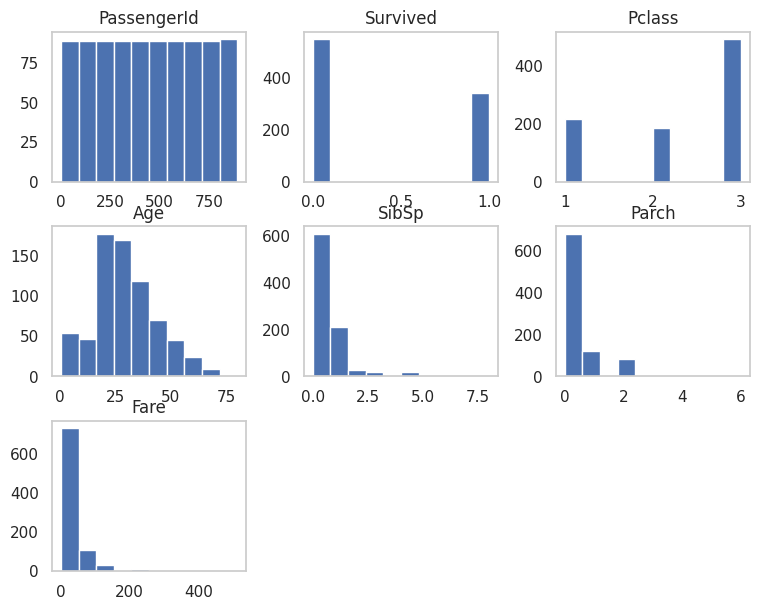

In [26]:
titanic.hist(bins=10,figsize=(9,7),grid=False);

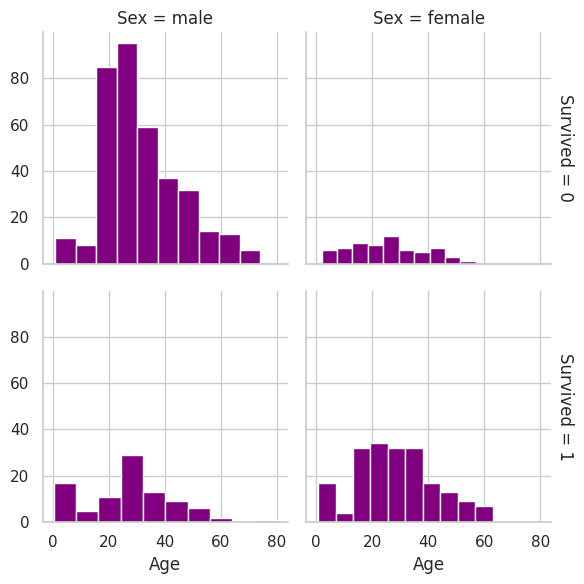

In [27]:
g = sns.FacetGrid(titanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

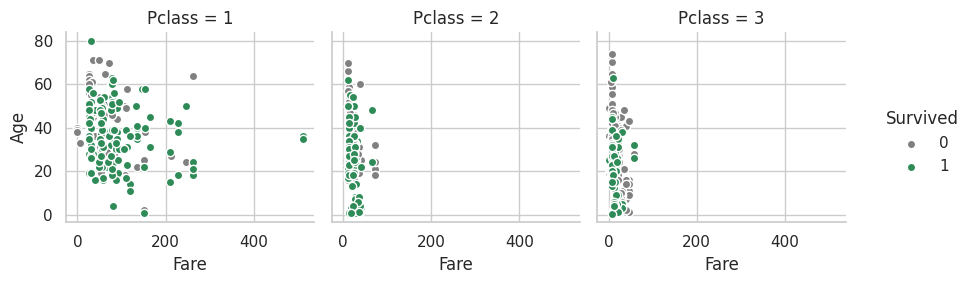

In [28]:
g = sns.FacetGrid(titanic, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

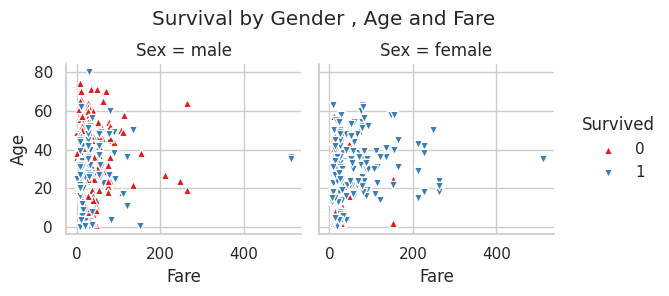

In [29]:
g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

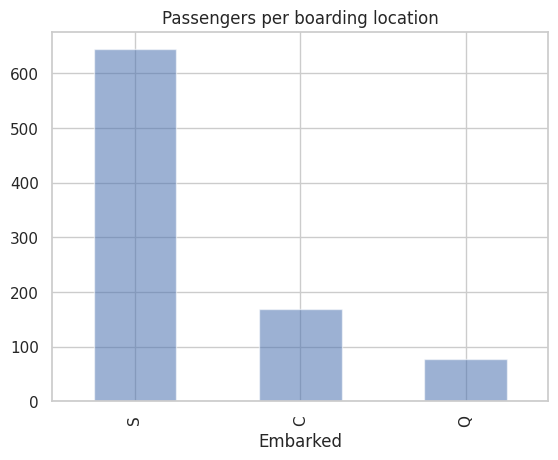

In [30]:
titanic.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");

/tmp/ipython-input-2818896240.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


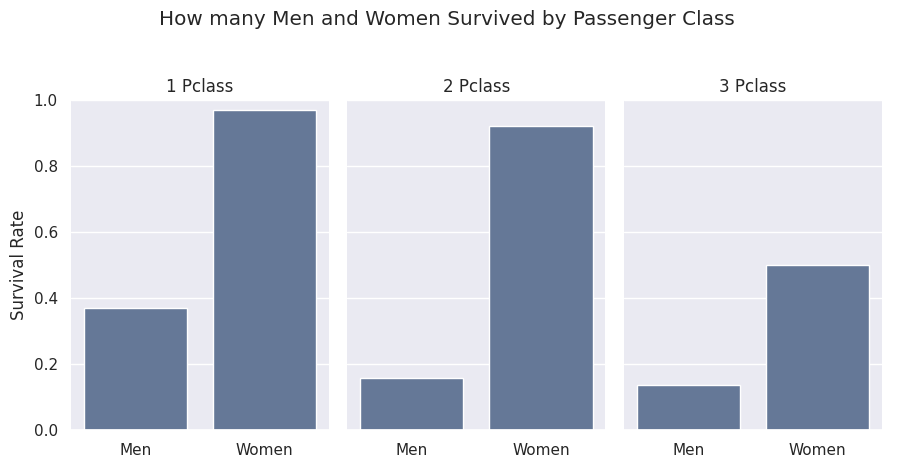

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1)

g = sns.catplot(
    x="Sex", y="Survived", col="Pclass",
    data=titanic, saturation=.5,
    kind="bar", ci=None, aspect=.6
)

(g.set_axis_labels("", "Survival Rate")
   .set_xticklabels(["Men", "Women"])
   .set_titles("{col_name} {col_var}")
   .set(ylim=(0, 1))
   .despine(left=True))

plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');


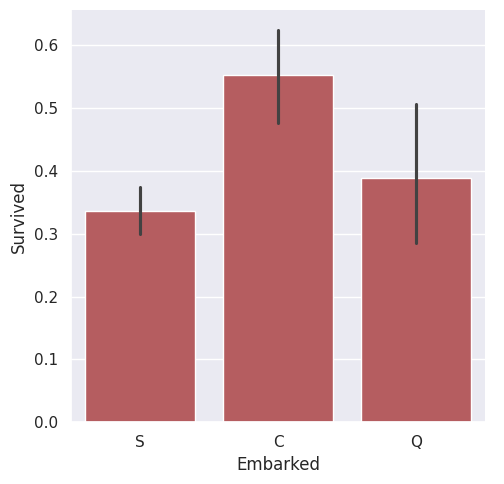

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# modern replacement of factorplot
sns.catplot(
    x="Embarked", y="Survived",
    data=titanic, kind="bar", color="r"
)

plt.show()

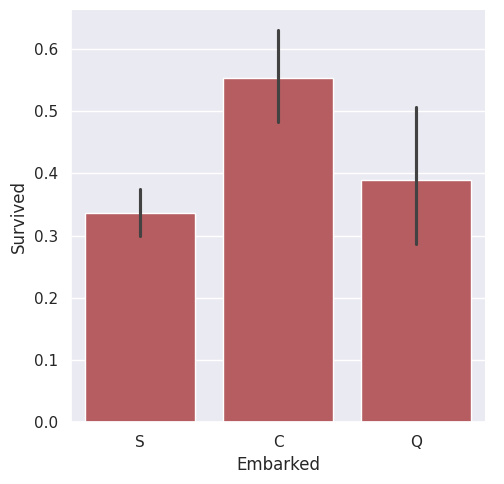

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x="Embarked", y="Survived",
    data=titanic, kind="bar", color="r"
)

plt.show()

/tmp/ipython-input-2077708628.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


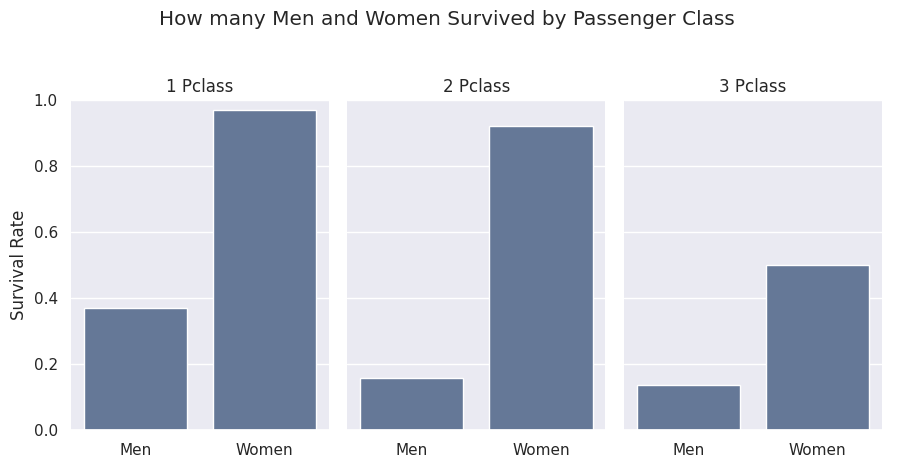

In [39]:
sns.set(font_scale=1)

g = sns.catplot(
    x="Sex", y="Survived", col="Pclass",
    data=titanic, saturation=.5,
    kind="bar", ci=None, aspect=.6
)

(g.set_axis_labels("", "Survival Rate")
   .set_xticklabels(["Men", "Women"])
   .set_titles("{col_name} {col_var}")
   .set(ylim=(0, 1))
   .despine(left=True))

plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class')
plt.show()


/tmp/ipython-input-260985817.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(


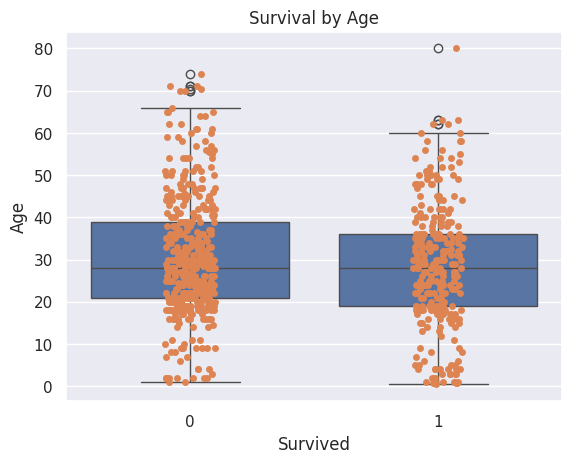

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.boxplot(x="Survived", y="Age", data=titanic)
ax = sns.stripplot(
    x="Survived", y="Age",
    data=titanic, jitter=True,
    edgecolor="gray"
)

plt.title("Survival by Age", fontsize=12)
plt.show()


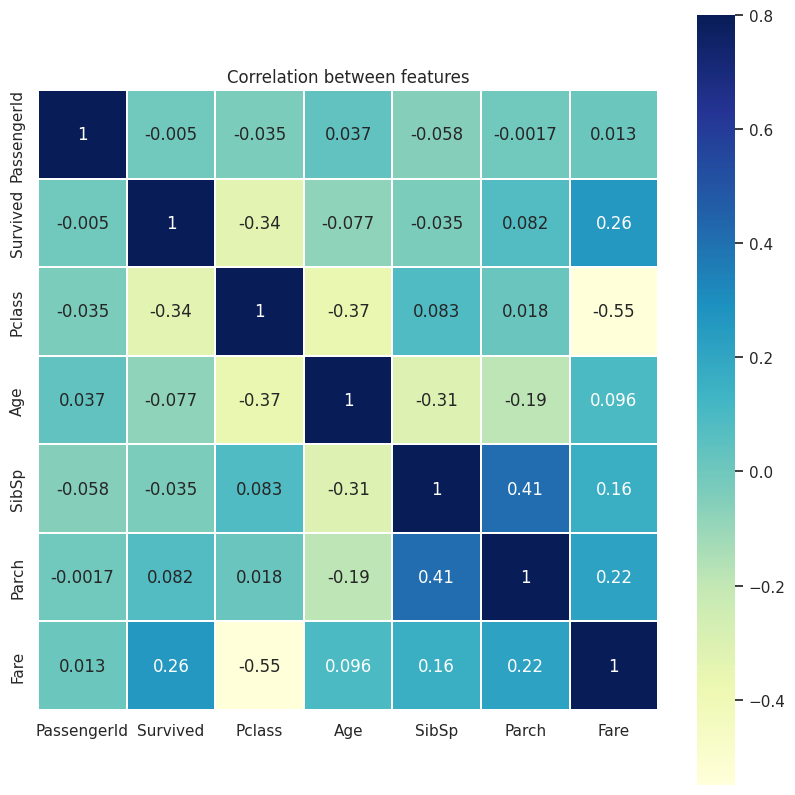

In [48]:

# compute correlation only on numeric columns
corr = titanic.corr(numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(
    corr, vmax=.8, linewidths=0.01,
    square=True, annot=True, cmap='YlGnBu', linecolor="white"
)
plt.title('Correlation between features')
plt.show()


In [49]:
# Correlation of features with target variable
corr_with_target = titanic.corr(numeric_only=True)["Survived"]
print(corr_with_target)


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


In [50]:
# correlation of features with target variable
corr_with_target = titanic.corr(numeric_only=True)["Survived"]
print(corr_with_target)


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


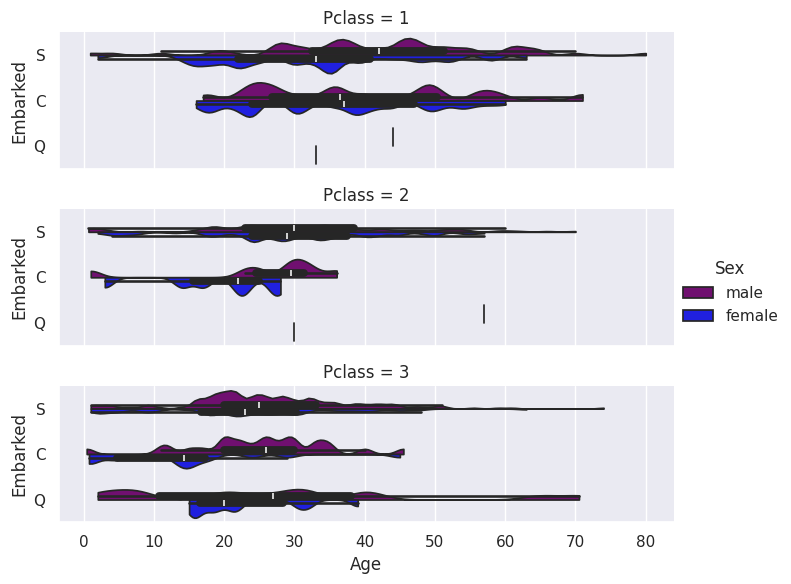

In [51]:

g = sns.catplot(
    x="Age", y="Embarked",
    hue="Sex", row="Pclass",
    data=titanic[titanic.Embarked.notnull()],
    orient="h", height=2, aspect=3.5,
    palette={'male': "purple", 'female': "blue"},
    kind="violin", split=True, cut=0, bw_adjust=0.2
)

plt.show()


In [54]:
# Let's check which rows have null Embarked column
titanic[titanic['Embarked'].isnull()]
titanic["Embarked"] = titanic["Embarked"].fillna('C')



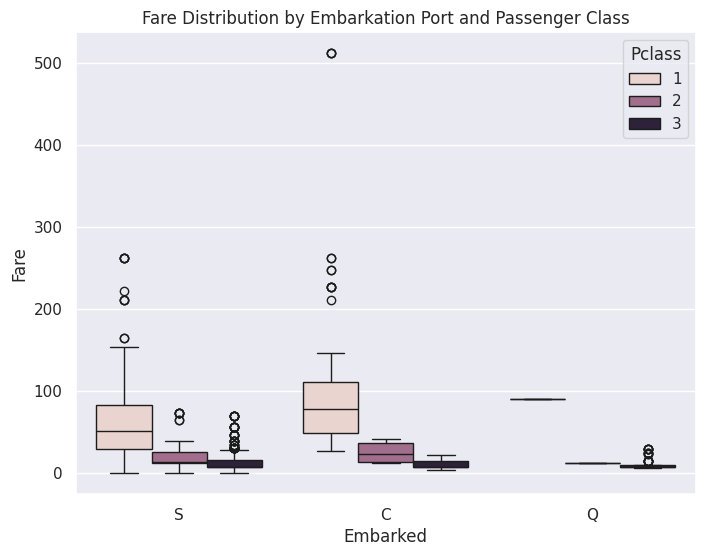

In [53]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic)
plt.title("Fare Distribution by Embarkation Port and Passenger Class")
plt.show()


In [56]:
titanic_test.describe()
# Find the row with missing Fare
titanic_test[titanic_test['Fare'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [57]:
fare_median = titanic_test.groupby(['Pclass','Embarked'])['Fare'].median()
titanic_test['Fare'] = titanic_test.apply(
    lambda row: fare_median[row['Pclass'], row['Embarked']] if pd.isnull(row['Fare']) else row['Fare'],
    axis=1
)


In [59]:
titanic_test[titanic_test['Fare'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [61]:
# Replace missing Fare with the median Fare of passengers in Pclass=3 and Embarked='S'
def fill_missing_fare(df):
    median_fare = df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

# Apply on titanic_test
titanic_test = fill_missing_fare(titanic_test)


In [62]:
# Extract first letter of Cabin to create Deck, and replace NaN with '0'
titanic["Deck"] = titanic["Cabin"].str[0].fillna("0")
titanic_test["Deck"] = titanic_test["Cabin"].str[0].fillna("0")

# Show unique Deck values
titanic["Deck"].unique()


array(['0', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Text(0.5, 1.05, 'Survival Count by Deck')

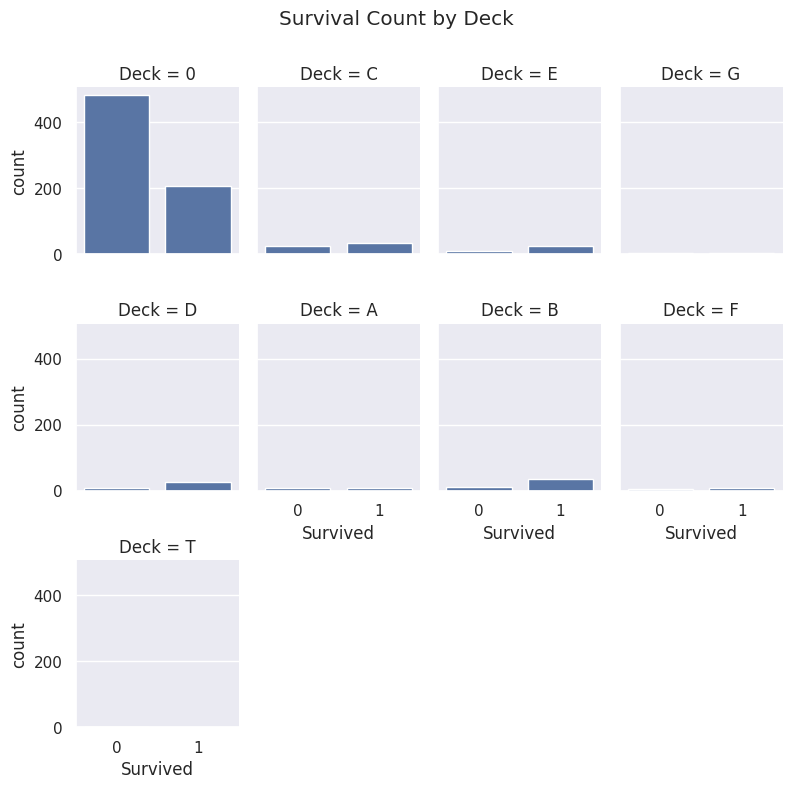

In [63]:
# Plot survival counts by Deck
g = sns.catplot(x="Survived", col="Deck", col_wrap=4,
                data=titanic[titanic["Deck"].notnull()],
                kind="count", height=2.5, aspect=.8)

# Add a global title
g.fig.suptitle("Survival Count by Deck", y=1.05)


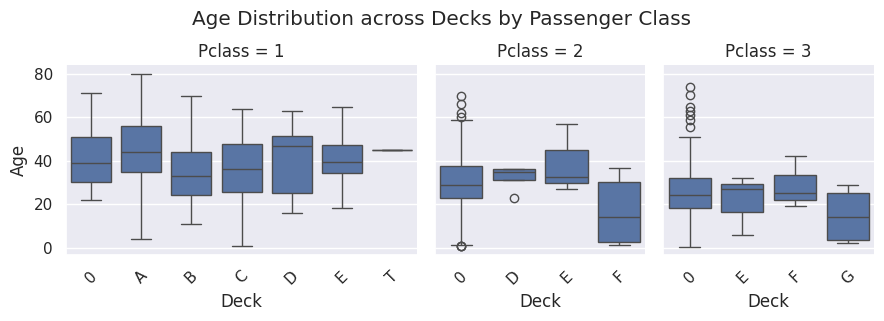

In [64]:
# Sort Titanic dataframe by Deck
titanic = titanic.assign(Deck=titanic["Deck"].astype(object)).sort_values("Deck")

# FacetGrid by Passenger Class
g = sns.FacetGrid(titanic, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})

# Map boxplots of Age across Deck
g.map_dataframe(sns.boxplot, x="Deck", y="Age")

# Rotate x-axis labels for readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.fig.suptitle("Age Distribution across Decks by Passenger Class", y=1.05)
plt.show()


In [65]:
titanic["Deck"].fillna("Z", inplace=True)
titanic_test["Deck"].fillna("Z", inplace=True)

# Show unique Deck values in sorted order
print(sorted(titanic["Deck"].unique()))


['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']


/tmp/ipython-input-1751108814.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Deck"].fillna("Z", inplace=True)
/tmp/ipython-input-1751108814.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [66]:
# Create FamilySize feature
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"] + 1

# Print distribution sorted by family size
print(titanic["FamilySize"].value_counts().sort_index())


FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


In [67]:
import numpy as np

conditions = [
    (titanic["FamilySize"] == 1),
    (titanic["FamilySize"] > 1) & (titanic["FamilySize"] < 5),
    (titanic["FamilySize"] >= 5)
]
choices = ["singleton", "small", "large"]

titanic["FsizeD"] = np.select(conditions, choices)
titanic_test["FsizeD"] = np.select(conditions, choices)

print(titanic["FsizeD"].unique())
print(titanic["FsizeD"].value_counts())


TypeError: Choicelist and default value do not have a common dtype: The DType <class 'numpy.dtypes._PyLongDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyLongDType'>)

In [68]:
print(titanic["FsizeD"].value_counts().sort_index())


KeyError: 'FsizeD'

SyntaxError: invalid syntax (ipython-input-739949011.py, line 1)

In [58]:
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].median())


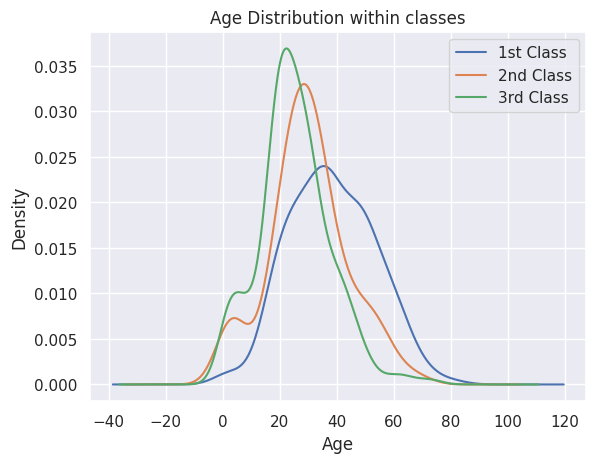

In [41]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

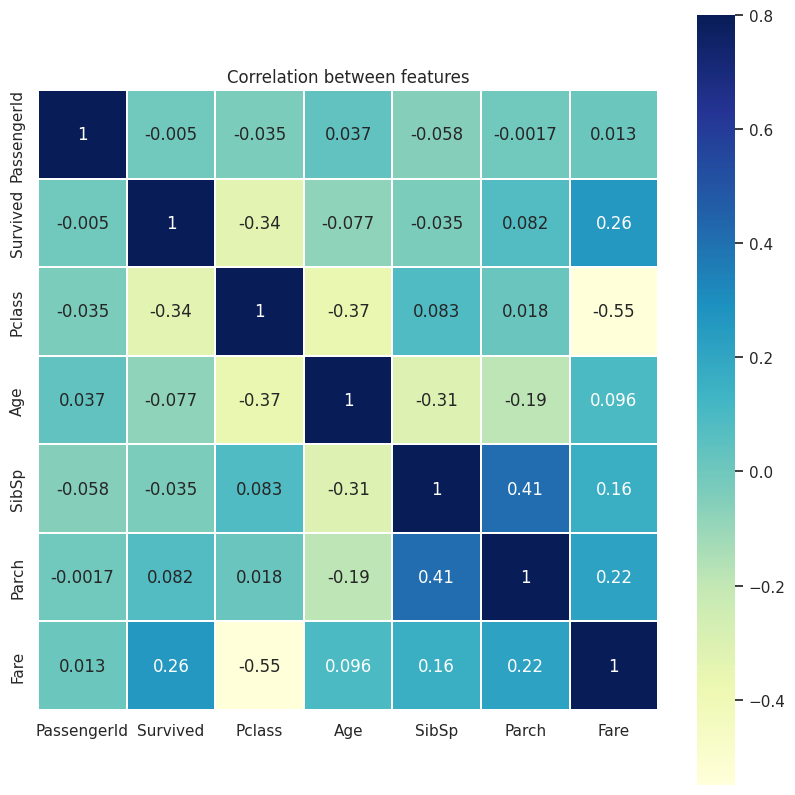

In [43]:

# compute correlation only on numeric columns
corr = titanic.corr(numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(
    corr, vmax=.8, linewidths=0.01,
    square=True, annot=True, cmap='YlGnBu', linecolor="white"
)
plt.title('Correlation between features')
plt.show()


/tmp/ipython-input-260985817.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(


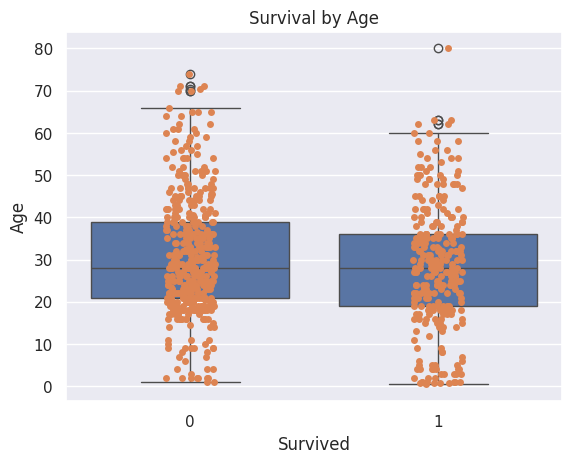

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.boxplot(x="Survived", y="Age", data=titanic)
ax = sns.stripplot(
    x="Survived", y="Age",
    data=titanic, jitter=True,
    edgecolor="gray"
)

plt.title("Survival by Age", fontsize=12)
plt.show()


In [45]:
# Correlation of features with target variable
corr_with_target = titanic.corr(numeric_only=True)["Survived"]
print(corr_with_target)


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


In [ ]:
# Create feature for length of name
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))
titanic_test["NameLength"] = titanic_test["Name"].apply(lambda x: len(x))

# Bin the name lengths
bins = [0, 20, 40, 57, 85]
group_names = ['short', 'okay', 'good', 'long']

titanic['NlengthD'] = pd.cut(titanic['NameLength'], bins, labels=group_names)
titanic_test['NlengthD'] = pd.cut(titanic_test['NameLength'], bins, labels=group_names)

# Replace factorplot with catplot
sns.catplot(x="NlengthD", y="Survived", data=titanic, kind="bar", height=4, aspect=1)

print(titanic["NlengthD"].unique())
print(titanic["NlengthD"].value_counts())


In [46]:


# Replace variants with common categories
titanic_test.loc[titanic_test["Title"] == "Mlle", "Title"] = 'Miss'
titanic_test.loc[titanic_test["Title"] == "Ms", "Title"] = 'Miss'
titanic_test.loc[titanic_test["Title"] == "Mme", "Title"] = 'Mrs'
titanic_test.loc[titanic_test["Title"].isin(rare_titles), "Title"] = 'Rare Title'

print("\nTEST title counts:")
print(titanic_test["Title"].value_counts())


AttributeError: module 'seaborn' has no attribute 'factorplot'